In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [47]:
#UA datasets
df_UA2022 = pd.read_csv("Data/UA2022.csv")
df_UA2023 = pd.read_csv("Data/UA2023.csv")
df_UA2024 = pd.read_csv("Data/UA2024.csv")

In [48]:
#Aricraft dataset
df_aircraft = pd.read_csv("Raw Data/aircraft.csv")
df_aircraft.rename(columns={"N-NUMBER": "TAIL_NUM"}, inplace=True)
df_aircraft

,TAIL_NUM,NO-SEATS
0,N100,2
1,N10000,5
2,N10001,3
3,N10004,4
4,N10006,4
...,...,...
300596,N9ZR,5
300597,N9ZS,1
300598,N9ZT,4
300599,N9ZU,2


In [61]:
df_aircraft[df_aircraft["TAIL_NUM"] == "N403UA"]

,TAIL_NUM,NO-SEATS


In [49]:
df_UA2022 = df_UA2022.drop(columns=['Unnamed: 0'])
df_UA2022

,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,ARR_TIME_BLK,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2022 12:00:00 AM,UA,1003,NaN,1003,11298,DFW,"Dallas/Fort Worth, TX",11618,EWR,...,1600-1659,1.0,0.0,1372.0,6,NaN,NaN,NaN,NaN,NaN
1,1/1/2022 12:00:00 AM,UA,1004,N75432,1004,12892,LAX,"Los Angeles, CA",12402,ITO,...,2200-2259,0.0,0.0,2449.0,10,NaN,NaN,NaN,NaN,NaN
2,1/1/2022 12:00:00 AM,UA,1005,N831UA,1005,14492,RDU,"Raleigh/Durham, NC",11292,DEN,...,1700-1759,0.0,0.0,1436.0,6,13.0,0.0,91.0,0.0,118.0
3,1/1/2022 12:00:00 AM,UA,1006,N27526,1006,14771,SFO,"San Francisco, CA",14747,SEA,...,1500-1559,0.0,0.0,679.0,3,17.0,0.0,0.0,0.0,26.0
4,1/1/2022 12:00:00 AM,UA,1007,N17752,1007,14107,PHX,"Phoenix, AZ",12266,IAH,...,0800-0859,0.0,0.0,1009.0,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263951,12/31/2022 12:00:00 AM,UA,796,N75426,796,11292,DEN,"Denver, CO",12266,IAH,...,0800-0859,0.0,0.0,862.0,4,NaN,NaN,NaN,NaN,NaN
1263952,12/31/2022 12:00:00 AM,UA,798,N23707,798,11503,EGE,"Eagle, CO",13930,ORD,...,1600-1659,0.0,0.0,1007.0,5,NaN,NaN,NaN,NaN,NaN
1263953,12/31/2022 12:00:00 AM,UA,800,N47284,800,11618,EWR,"Newark, NJ",13204,MCO,...,0900-0959,0.0,0.0,937.0,4,NaN,NaN,NaN,NaN,NaN
1263954,12/31/2022 12:00:00 AM,UA,912,N37542,912,14771,SFO,"San Francisco, CA",12173,HNL,...,1000-1059,0.0,0.0,2398.0,10,NaN,NaN,NaN,NaN,NaN


In [50]:
# Concatenate DataFrames
df_combined = pd.concat([
    df_UA2022, 
    df_UA2023,
    df_UA2024
    ], ignore_index=True)

# Display the combined DataFrame
df_combined.head()

,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,ARR_TIME_BLK,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2022 12:00:00 AM,UA,1003.0,NaN,1003.0,11298,DFW,"Dallas/Fort Worth, TX",11618,EWR,...,1600-1659,1.0,0.0,1372.0,6,NaN,NaN,NaN,NaN,NaN
1,1/1/2022 12:00:00 AM,UA,1004.0,N75432,1004.0,12892,LAX,"Los Angeles, CA",12402,ITO,...,2200-2259,0.0,0.0,2449.0,10,NaN,NaN,NaN,NaN,NaN
2,1/1/2022 12:00:00 AM,UA,1005.0,N831UA,1005.0,14492,RDU,"Raleigh/Durham, NC",11292,DEN,...,1700-1759,0.0,0.0,1436.0,6,13.0,0.0,91.0,0.0,118.0
3,1/1/2022 12:00:00 AM,UA,1006.0,N27526,1006.0,14771,SFO,"San Francisco, CA",14747,SEA,...,1500-1559,0.0,0.0,679.0,3,17.0,0.0,0.0,0.0,26.0
4,1/1/2022 12:00:00 AM,UA,1007.0,N17752,1007.0,14107,PHX,"Phoenix, AZ",12266,IAH,...,0800-0859,0.0,0.0,1009.0,5,NaN,NaN,NaN,NaN,NaN


In [51]:
# Display the number of rows in the combined DataFrame
num_rows = df_combined.shape[0]
print(f"Number of rows in df_combined: {num_rows}")

Number of rows in df_combined: 3755726


In [53]:
#Select UA flights that were not cancelled or diverted
df_filtered = df_combined[(df_combined["MKT_UNIQUE_CARRIER"] == "UA") & ((df_combined["CANCELLED"] == 0) & (df_combined["DIVERTED"] == 0))]
df_filtered

,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,ARR_TIME_BLK,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1,1/1/2022 12:00:00 AM,UA,1004.0,N75432,1004.0,12892,LAX,"Los Angeles, CA",12402,ITO,...,2200-2259,0.0,0.0,2449.0,10,NaN,NaN,NaN,NaN,NaN
2,1/1/2022 12:00:00 AM,UA,1005.0,N831UA,1005.0,14492,RDU,"Raleigh/Durham, NC",11292,DEN,...,1700-1759,0.0,0.0,1436.0,6,13.0,0.0,91.0,0.0,118.0
3,1/1/2022 12:00:00 AM,UA,1006.0,N27526,1006.0,14771,SFO,"San Francisco, CA",14747,SEA,...,1500-1559,0.0,0.0,679.0,3,17.0,0.0,0.0,0.0,26.0
4,1/1/2022 12:00:00 AM,UA,1007.0,N17752,1007.0,14107,PHX,"Phoenix, AZ",12266,IAH,...,0800-0859,0.0,0.0,1009.0,5,NaN,NaN,NaN,NaN,NaN
5,1/1/2022 12:00:00 AM,UA,1008.0,N486UA,1008.0,11618,EWR,"Newark, NJ",14492,RDU,...,2300-2359,0.0,0.0,416.0,2,126.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755721,11/30/2024 12:00:00 AM,UA,795.0,N39461,795.0,13930,ORD,"Chicago, IL",11618,EWR,...,2000-2059,0.0,0.0,719.0,3,0.0,0.0,176.0,0.0,10.0
3755722,11/30/2024 12:00:00 AM,UA,796.0,N68842,796.0,11292,DEN,"Denver, CO",12266,IAH,...,0800-0859,0.0,0.0,862.0,4,NaN,NaN,NaN,NaN,NaN
3755723,11/30/2024 12:00:00 AM,UA,797.0,N73251,797.0,12266,IAH,"Houston, TX",11292,DEN,...,1400-1459,0.0,0.0,862.0,4,7.0,0.0,0.0,0.0,13.0
3755724,11/30/2024 12:00:00 AM,UA,798.0,N17349,798.0,11292,DEN,"Denver, CO",12264,IAD,...,2100-2159,0.0,0.0,1452.0,6,NaN,NaN,NaN,NaN,NaN


In [54]:
# Display the number of rows in the filtered DataFrame
df_filtered.shape[0]

3718022

In [55]:
#Left join the combined DataFrame with the aircraft DataFrame  
df_filtered = pd.merge(df_filtered, df_aircraft, on='TAIL_NUM', how='left')
df_filtered.head()

,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,NO-SEATS
0,1/1/2022 12:00:00 AM,UA,1004.0,N75432,1004.0,12892,LAX,"Los Angeles, CA",12402,ITO,...,0.0,0.0,2449.0,10,NaN,NaN,NaN,NaN,NaN,191.0
1,1/1/2022 12:00:00 AM,UA,1005.0,N831UA,1005.0,14492,RDU,"Raleigh/Durham, NC",11292,DEN,...,0.0,0.0,1436.0,6,13.0,0.0,91.0,0.0,118.0,179.0
2,1/1/2022 12:00:00 AM,UA,1006.0,N27526,1006.0,14771,SFO,"San Francisco, CA",14747,SEA,...,0.0,0.0,679.0,3,17.0,0.0,0.0,0.0,26.0,48.0
3,1/1/2022 12:00:00 AM,UA,1007.0,N17752,1007.0,14107,PHX,"Phoenix, AZ",12266,IAH,...,0.0,0.0,1009.0,5,NaN,NaN,NaN,NaN,NaN,149.0
4,1/1/2022 12:00:00 AM,UA,1008.0,N486UA,1008.0,11618,EWR,"Newark, NJ",14492,RDU,...,0.0,0.0,416.0,2,126.0,0.0,0.0,0.0,0.0,200.0


In [60]:
df_filtered[df_filtered["NO-SEATS"].isnull()]

,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,CANCELLED,DIVERTED,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,NO-SEATS
8,1/1/2022 12:00:00 AM,UA,1022.0,N403UA,1022.0,11292,DEN,"Denver, CO",14122,PIT,...,0.0,0.0,1290.0,6,24.0,0.0,16.0,0.0,0.0,NaN
62,1/1/2022 12:00:00 AM,UA,1155.0,N422UA,1155.0,11292,DEN,"Denver, CO",12339,IND,...,0.0,0.0,977.0,4,56.0,0.0,0.0,0.0,0.0,NaN
64,1/1/2022 12:00:00 AM,UA,1157.0,N407UA,1157.0,10721,BOS,"Boston, MA",12264,IAD,...,0.0,0.0,413.0,2,NaN,NaN,NaN,NaN,NaN,NaN
159,1/1/2022 12:00:00 AM,UA,1420.0,N409UA,1420.0,11697,FLL,"Fort Lauderdale, FL",12266,IAH,...,0.0,0.0,966.0,4,NaN,NaN,NaN,NaN,NaN,NaN
161,1/1/2022 12:00:00 AM,UA,1422.0,N422UA,1422.0,12339,IND,"Indianapolis, IN",11292,DEN,...,0.0,0.0,977.0,4,7.0,0.0,0.0,0.0,39.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384382,9/6/2024 12:00:00 AM,UA,2854.0,N417UA,2854.0,13930,ORD,"Chicago, IL",11298,DFW,...,0.0,0.0,802.0,4,0.0,0.0,26.0,0.0,0.0,NaN
3385084,9/6/2024 12:00:00 AM,UA,455.0,N417UA,455.0,10821,BWI,"Baltimore, MD",13930,ORD,...,0.0,0.0,622.0,3,NaN,NaN,NaN,NaN,NaN,NaN
3386741,9/7/2024 12:00:00 AM,UA,1114.0,N417UA,1114.0,11292,DEN,"Denver, CO",15380,TVC,...,0.0,0.0,1032.0,5,NaN,NaN,NaN,NaN,NaN,NaN
3386980,9/7/2024 12:00:00 AM,UA,1378.0,N417UA,1378.0,12441,JAC,"Jackson, WY",11292,DEN,...,0.0,0.0,406.0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_filtered.to_csv('UA2022_20224.csv', index=False)

AIRCRAFT CODE

In [34]:
aircraft_ref = pd.read_csv("ACFTREF.txt")
aircraft_master = pd.read_csv("MASTER.txt")

In [35]:
aircraft_ref.head()

,CODE,MFR,MODEL,TYPE-ACFT,TYPE-ENG,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,AC-WEIGHT,SPEED,TC-DATA-SHEET,TC-DATA-HOLDER,Unnamed: 13
0,0020901,AAR AIRLIFT GROUP INC,UH-60A,6,3,1,0,2,15,CLASS 3,0,,...,NaN
1,0030109,EXLINE ACE-C,ACE-C,4,1,1,1,1,1,CLASS 1,82,,...,NaN
2,003010D,DELEBAUGH,P,4,1,1,1,1,1,CLASS 1,82,,...,NaN
3,003010H,DAL PORTO,BABY ACE D,4,1,1,1,1,1,CLASS 1,82,,...,NaN
4,003010P,DUNN,BABY ACE,4,1,1,1,1,1,CLASS 1,82,,...,NaN


In [36]:
aircraft_master.head()

,N-NUMBER,SERIAL NUMBER,MFR MDL CODE,ENG MFR MDL,YEAR MFR,TYPE REGISTRANT,NAME,STREET,STREET2,CITY,...,OTHER NAMES(2),OTHER NAMES(3),OTHER NAMES(4),OTHER NAMES(5),EXPIRATION DATE,UNIQUE ID,KIT MFR,KIT MODEL,MODE S CODE HEX,Unnamed: 34
0,100,5334,7100510,17003,1940,1,BENE MARY D ...,PO BOX 329,,KETCHUM,...,...,...,...,...,20270430,600060,,,A004B3,NaN
1,10000,10000,2130004,,,7,9AT LLC ...,511 WEDGEWOOD AVE,,NASHVILLE,...,...,...,...,...,20310831,1443200,,,A00725,NaN
2,10001,A28,9601202,67007,1928,1,STOOS ROBERT A ...,PO BOX 1056,,LAKELAND,...,...,...,...,...,20290228,432072,,,A00726,NaN
3,10004,T18208245,2072738,,,7,ETOS AIR LLC ...,PO BOX 288,,NEW LONDON,...,...,...,...,...,20290331,102879,,,A00729,NaN
4,10006,BG-72,1152020,17026,1955,1,COUTCHES ROBERT HERCULES DBA ...,550 AIRWAY BLVD,,LIVERMORE,...,...,...,...,...,20280229,480110,,,A0072B,NaN


In [37]:
# Trim blank spaces within columns
aircraft_ref = aircraft_ref.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
aircraft_master = aircraft_master.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [47]:
aircraft_master = aircraft_master[["N-NUMBER", "MFR MDL CODE"]]
aircraft_ref = aircraft_ref[['CODE', 'NO-SEATS']]

In [58]:
# Merge aircraft_master and aircraft_ref on 'MFR MDL CODE' and 'CODE'
aircraft = pd.merge(aircraft_master, aircraft_ref, left_on='MFR MDL CODE', right_on='CODE')
aircraft = aircraft[["N-NUMBER", "NO-SEATS"]]

In [59]:
#Add 'N' to the beginning of the 'N-NUMBER' column
aircraft['N-NUMBER'] = "N" + aircraft['N-NUMBER'].astype(str)
aircraft.head()

,N-NUMBER,NO-SEATS
0,N100,2
1,N10000,5
2,N10001,3
3,N10004,4
4,N10006,4


In [61]:
aircraft.to_csv('aircraft.csv', index=False)

FORECASTING

In [67]:
df_filtered['FL_FIRST_DAY'] = pd.to_datetime(df_filtered['FL_DATE']).dt.to_period('M').dt.to_timestamp()
df_filtered

C:\Users\alfar\AppData\Local\Temp\ipykernel_31372\3404580937.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['FL_FIRST_DAY'] = pd.to_datetime(df_filtered['FL_DATE']).dt.to_period('M').dt.to_timestamp()


,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,NO-SEATS,FL_MONTH,FL_YEAR,FL_FIRST_DAY
0,1/1/2022 12:00:00 AM,UA,1004.0,N75432,1004.0,12892,LAX,"Los Angeles, CA",12402,ITO,...,10,NaN,NaN,NaN,NaN,NaN,191.0,1,2022,2022-01-01
1,1/1/2022 12:00:00 AM,UA,1005.0,N831UA,1005.0,14492,RDU,"Raleigh/Durham, NC",11292,DEN,...,6,13.0,0.0,91.0,0.0,118.0,179.0,1,2022,2022-01-01
2,1/1/2022 12:00:00 AM,UA,1006.0,N27526,1006.0,14771,SFO,"San Francisco, CA",14747,SEA,...,3,17.0,0.0,0.0,0.0,26.0,48.0,1,2022,2022-01-01
3,1/1/2022 12:00:00 AM,UA,1007.0,N17752,1007.0,14107,PHX,"Phoenix, AZ",12266,IAH,...,5,NaN,NaN,NaN,NaN,NaN,149.0,1,2022,2022-01-01
4,1/1/2022 12:00:00 AM,UA,1008.0,N486UA,1008.0,11618,EWR,"Newark, NJ",14492,RDU,...,2,126.0,0.0,0.0,0.0,0.0,200.0,1,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718017,11/30/2024 12:00:00 AM,UA,795.0,N39461,795.0,13930,ORD,"Chicago, IL",11618,EWR,...,3,0.0,0.0,176.0,0.0,10.0,191.0,11,2024,2024-11-01
3718018,11/30/2024 12:00:00 AM,UA,796.0,N68842,796.0,11292,DEN,"Denver, CO",12266,IAH,...,4,NaN,NaN,NaN,NaN,NaN,191.0,11,2024,2024-11-01
3718019,11/30/2024 12:00:00 AM,UA,797.0,N73251,797.0,12266,IAH,"Houston, TX",11292,DEN,...,4,7.0,0.0,0.0,0.0,13.0,149.0,11,2024,2024-11-01
3718020,11/30/2024 12:00:00 AM,UA,798.0,N17349,798.0,11292,DEN,"Denver, CO",12264,IAD,...,6,NaN,NaN,NaN,NaN,NaN,175.0,11,2024,2024-11-01


In [75]:
df_delay = df_filtered[df_filtered["ARR_DELAY_NEW"] >= 360]
df_delay

,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,NO-SEATS,FL_MONTH,FL_YEAR,FL_FIRST_DAY
46,1/1/2022 12:00:00 AM,UA,1114.0,N17244,1114.0,11292,DEN,"Denver, CO",10423,AUS,...,4,578.0,0.0,0.0,0.0,115.0,149.0,1,2022,2022-01-01
175,1/1/2022 12:00:00 AM,UA,1453.0,N12218,1453.0,13930,ORD,"Chicago, IL",11618,EWR,...,3,747.0,0.0,9.0,0.0,0.0,149.0,1,2022,2022-01-01
177,1/1/2022 12:00:00 AM,UA,1455.0,N79521,1455.0,11292,DEN,"Denver, CO",13502,MTJ,...,1,364.0,0.0,18.0,0.0,0.0,149.0,1,2022,2022-01-01
182,1/1/2022 12:00:00 AM,UA,1470.0,N27503,1470.0,10721,BOS,"Boston, MA",12264,IAD,...,2,84.0,0.0,0.0,0.0,334.0,48.0,1,2022,2022-01-01
195,1/1/2022 12:00:00 AM,UA,1493.0,N37523,1493.0,12266,IAH,"Houston, TX",11292,DEN,...,4,28.0,0.0,66.0,0.0,281.0,48.0,1,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717155,11/30/2024 12:00:00 AM,UA,5547.0,N784SK,5547.0,14771,SFO,"San Francisco, CA",14869,SLC,...,3,382.0,0.0,0.0,0.0,0.0,80.0,11,2024,2024-11-01
3717253,11/30/2024 12:00:00 AM,UA,5646.0,N919EV,5646.0,13930,ORD,"Chicago, IL",10408,ATW,...,1,539.0,0.0,0.0,0.0,0.0,55.0,11,2024,2024-11-01
3717437,11/30/2024 12:00:00 AM,UA,5842.0,N975SW,5842.0,13930,ORD,"Chicago, IL",11986,GRR,...,1,0.0,0.0,0.0,0.0,572.0,55.0,11,2024,2024-11-01
3717566,11/30/2024 12:00:00 AM,UA,5969.0,N131SY,5969.0,13930,ORD,"Chicago, IL",14574,ROA,...,3,435.0,0.0,37.0,0.0,0.0,88.0,11,2024,2024-11-01


In [76]:
#Summarized data
df_summarized = df_delay.groupby(['FL_FIRST_DAY']).size().reset_index(name='COUNT') 
df_summarized   

,FL_FIRST_DAY,COUNT
0,2022-01-01,353
1,2022-02-01,331
2,2022-03-01,366
3,2022-04-01,353
4,2022-05-01,446
5,2022-06-01,473
6,2022-07-01,359
7,2022-08-01,428
8,2022-09-01,216
9,2022-10-01,244


In [88]:
#Moving Averages
df_summarized['COUNT_SMOOTHED'] = df_summarized['COUNT'].rolling(window=4).mean()
df_summarized

,FL_FIRST_DAY,COUNT,COUNT_SMOOTHED
0,2022-01-01,353,NaN
1,2022-02-01,331,NaN
2,2022-03-01,366,NaN
3,2022-04-01,353,350.75
4,2022-05-01,446,374.00
5,2022-06-01,473,409.50
6,2022-07-01,359,407.75
7,2022-08-01,428,426.50
8,2022-09-01,216,369.00
9,2022-10-01,244,311.75


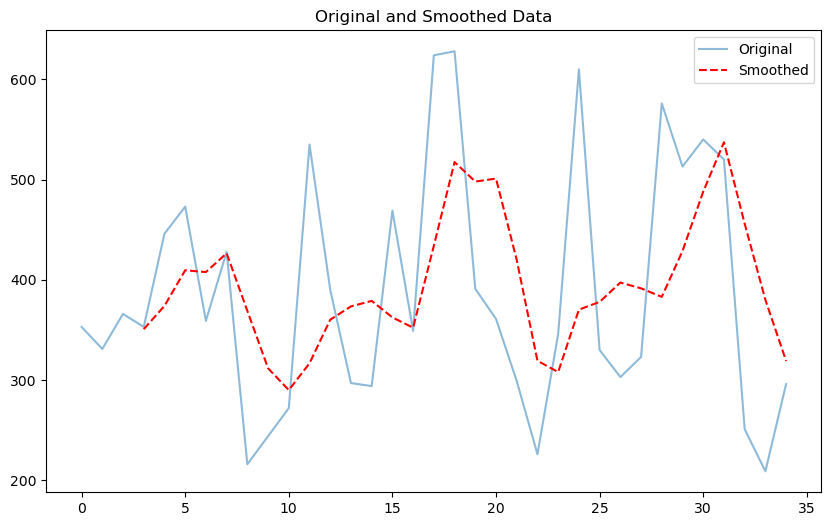

In [89]:
plt.figure(figsize=(10, 6))
df_summarized['COUNT'].plot(label='Original', alpha=0.5)
df_summarized['COUNT_SMOOTHED'].plot(label='Smoothed', style='r--')
plt.title('Original and Smoothed Data')
plt.legend()
plt.show()

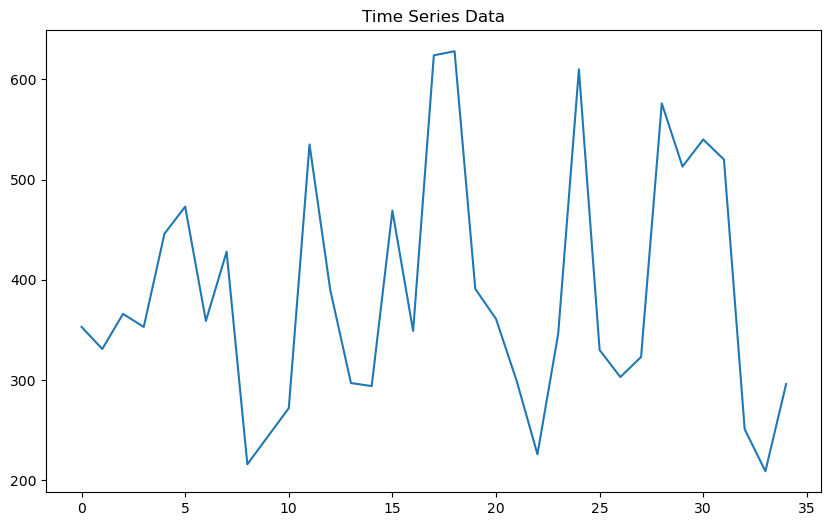

In [ ]:
# Original Plot the time series data
df_summarized['COUNT'].plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.show()

In [90]:
# Fit the ARIMA model
model = ARIMA(df_summarized['COUNT_SMOOTHED'], order=(5, 1, 0))  # (p, d, q) order parameters
model_fit = model.fit()

In [91]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         COUNT_SMOOTHED   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -163.948
Date:                Thu, 13 Mar 2025   AIC                            339.897
Time:                        14:23:21   BIC                            349.055
Sample:                             0   HQIC                           343.020
                                 - 35                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4268      0.186      2.294      0.022       0.062       0.791
ar.L2         -0.3197      0.230     -1.390      0.164      -0.770       0.131
ar.L3         -0.1196      0.230     -0.520      0.6

In [92]:
# Forecast the next 10 periods
forecast = model_fit.forecast(steps=10)
print(forecast)

35    316.137030
36    372.627091
37    422.458030
38    439.237130
39    419.943562
40    382.536708
41    359.498106
42    362.503316
43    382.928623
44    403.640439
Name: predicted_mean, dtype: float64


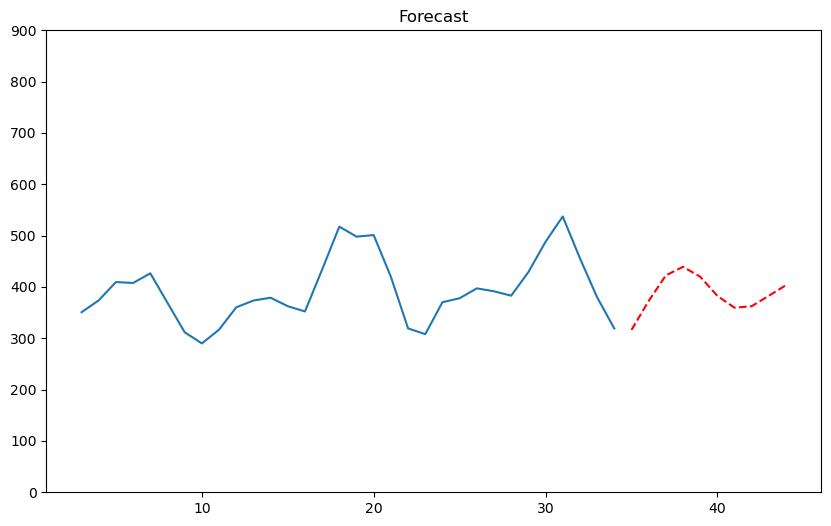

In [97]:
# Plot the forecast
df_summarized['COUNT_SMOOTHED'].plot(figsize=(10, 6))
forecast.plot(style='r--')
plt.ylim(bottom=0) 
plt.ylim(top=900) 
plt.title('Forecast')
plt.show()

CLUSTERING